# **Algoritmo para o cálculo da Lei de Leavitt para galáxias**
#### *Autor: Kevin Mota da Costa*
> *Algoritmo para o cálculo da Lei de Leavitt para galáxias, utilizando a metodologia desenvolvida no trabalho denominado "Determinação das distâncias ás Nuvens de Magalhães através das estrelas variáveis cefeidas disponiveis no catálogo OGLE III" desenvolvido pelo Dr. Alan Miguel Velasquez Toribio, professor adjunto da Universidade Federal do Espirito Santo e por Kevin Mota da Costa, aluno do curso de bacharelado em física na Universidade Federal do Espírito Santo.*

# Função do algoritmo

> Objetivos principais e metodologia executada pelo algoritmo.

O algoritmo tem o propósito de calcular a Lei de Leavitt para estrelas variáveis cefeidas em uma galáxia, para isso o algoritmo faz o uso do periodograma LombScargle,<br>
do método de ajuste dos minimos quadrados não linear e de uma análise de imagens para uma quantificação de dispersão dos dados.

# Instruções de uso do algoritmo<br>
> *Instruções de uso do algoritmo*

Para o funcionamento correto do algoritmo, o usuário deve - preliminarmente - criar um diretório denominado "DATABASE" contendo arquivos de texto <br>
com os dados das estrelas, cada estrela será representada por um arquivo de texto organizado em colunas separadas por um espaço simples " ", a primeira<br>
coluna deverá conter o tempo (em dias julianos), a segunda coluna deverá conter a magnitude aparente (em unidades arbritrárias) e a segunda coluna deverá<br>
conter o erro na magnitude aparente (em unidades arbritárias).

# Estrutura do algoritmo

> Explicação sobre a estrutura de funcionamento do algoritmo

# Primeira etapa: Carregar os Arquivos

> O algoritmo se inicia carregando e organizando os arquivos das estrelas a serem trabalhadas

Para a leitura e organização dos dados são utilizadas as bibliotecas "shutil" e "os".

<pre>   - Funções importadas da biblioteca "os":     "mkdir", "listdir"<br>
<pre>   - Funções importados da biblioteca "shutil": "rmtree"<br>
<pre>   - Métodos importados da função "os.path":    "isdir"<br>

Função das funções e dos métodos utlizados:

<pre>   - "mkdir":   criar um novo diretório.
<pre>   - "listdir": listar - em uma tupla - os arquivos em um diretório.
<pre>   - "rmtree":  remover um diretório com seus arquivos.
<pre>   - "isdir":   verificar a existência de um diretório.

>Esse bloco de código importa as bibliotecas e métodos necessários ao primeiro passo:

In [1]:
from os import mkdir,listdir
from shutil import rmtree
from os.path import isdir

Para a leitura e organização dos dados é definida a função "redefinir":<br>
- A função "redefinir" verifica a existência de resultados de processamentos de dados anteriores, os exclui e cria um novo deretório para os resultados. As pastas são:<br>

<pre>- RESULTS:                diretório onde serão salvos os resultados.
<pre>- RESULTS/fase-data:      diretório onde ficarão os dados da curva de luz das estrelas no espaço de fase.
<pre>- RESULTS/fase:           diretório onde ficarão salvas as curvas de luz das estrela no espaço de fase.
<pre>- RESULTS/fase/dispersas: diretório onde ficarão salvas as curvas de luz das estrela no espaço de fase para as estrelas que não passaram nos testes de
<pre>                          dispersão.
<pre>- DISPERSAO:              diretório onde serão movidas as estrelas que falharem nos testes de dispersão.</pre>
*\*O diretório DISPERSAO é criado somente se não houver um diretório DISPERSAO criando anteriormente*

>Após criar as pastas, a função lê os dados na pasta DATABASE e retorna uma tupla com o nome dos arquivos que contem os dados.

In [2]:
def redefinir():
        
        if isdir('./RESULTS/'):
            rmtree('./RESULTS/')

        if not isdir('./DISPERSAO/'):
            mkdir('./DISPERSAO/')
            
        mkdir('./RESULTS/')
        mkdir('./RESULTS/fase')
        mkdir('./RESULTS/Fase-Data')
        mkdir('./RESULTS/fase/dispersas')

        return tuple(listdir('.\DATABASE'))

>Esse bloco executa a função "redefinir" e cria uma variável denominada "DATABASE" contendo o nome dos arquivos de dados das estrelas contidas no database.

In [3]:
DATABASE= redefinir()

# Segunda etapa: Calcular os Periodos

> Após a organização dos dados, o algoritmo calcula - através do método LombScargle - o periodo de oscilação das estrelas, e calcula a Lei de Leavitt para a galáxia

Para o calculo dos periodos de oscilação das estrelas e para o calculo da Lei de Leavitt para a galáxia estudada, são necessárias as bibliotecas "os", "ipywidgets", "matplotlib", "numpy", "astropy", "scipy" e "Ipython".

<pre>   - Métodos importados da função "os.path":           "splitext"
<pre>   - Funções importadas da biblioteca "ipywidgets":    "IntProgress"
<pre>   - Métodos importados da função "matplotlib.pyplot": "clf", "savefig", "scatter", "title", "xlabel", "ylabel", "close", "gcf", "plot" e "show"
<pre>   - Funções importadas da biblioteca numpy:           "loadtxt", "mean", "log10", "sqrt", "diag" e "linspace"
<pre>   - Métodos importados da função astropy.timeseries:  "LombScargle"
<pre>   - Métodos importados da função scipy.optimize:      "curve_fit"
<pre>   - Métodos importados da função IPython.display:     "Latex"

Função das funções e dos métodos utlizados:

<pre>   - "splitext":   divide um texto em tuplas, a divisão dos elementos da tupla é feita a cada caracter ".".
<pre>   - "Intprogres": cria uma barra de progresso.
<pre>   - "clf":        limpa a figura que está na memória da biblioteca matplotlib.
<pre>   - "savefig":    salva a figura que está na memória da biblioteca matplotlib.
<pre>   - "scatter":    cria um grafico de dispersão dos dados recebidos.
<pre>   - "title":      cria um titulo para o grafico.
<pre>   - "xlabel":     cria um titulo para o eixo x do grafico.
<pre>   - "ylabel":     cria um titulo para o eixo y do grafico.
<pre>   - "close":      fecha o gráfico exibido na biblioteca matplotlib.
<pre>   - "plot":       plota um conjunto de dados "contínuos" (na computação, um conjunto de dados não é perfeitamente contínuo).
<pre>   - "show":       salva o grafico na memoria do matplotlib e mostra o grafico para o usuário.
<pre>   - "loadtxt":    lê um arquivo do tipo txt.
<pre>   - "mean":       calcula a média de um array.
<pre>   - "log10":      calcula o logatírimo de base 10 de uma variável do tipo array ou do tipo float.
<pre>   - "sqrt":       calcula a raiz quadrada de uma variável do tipo array ou do tipo float.
<pre>   - "diag":       recebe uma matriz e retorna sua diagonal em um array.
<pre>   - "linspace":   cria um array de floats dentro de um intervalo definido.
<pre>   - "LombScargle  recebe um dois vetores de dados e retorna um vetor de periodos possiveis e um vetor com a potência de espectro 
<pre>                   de fourier associada a cada periodo.
<pre>   - "curve_fit"   recebe uma função e dois vetores de dados e retorna, a partir de um ajuste pelo método dos minimos quadrados 
<pre>                   não linear, os coeficientes do ajuste com sua matriz de covariância.
<pre>   - "Latex"       recebe uma string no formato f' na linguagem Latex e retorna uma string em formato s' transformada e linguagem de string.

>Esse bloco de código importa as bibliotecas e métodos necessários ao segundo passo:

In [4]:
from os.path import splitext
from ipywidgets import IntProgress
from matplotlib.pyplot import clf,savefig,scatter,title,xlabel,ylabel,close,plot,show
from numpy import loadtxt,mean,log10,sqrt,diag,linspace
from astropy.timeseries import LombScargle
from scipy.optimize import curve_fit
from IPython.display import Latex

Para o calculo dos periodos e da Lei de Leavitt são definidas as funções "imprimir" e "ajuste".
- A função "imprimir" recebe uma tupla e a imprime em um arquivo txt denominado "results.txt"
- A função "ajuste" recebe duas tuplas e uma string, faz um ajuste das tuplas - através do método<br>"curve_fit" - em uma reta, calcula o erro do ajuste, mostra a curva de ajuste e a salva em um arquivo png

In [5]:
def imprimir(nome,periodos,log_periodo,mag):
        '''Essa função é responsável por imprimir os resultados
        em um arquivo  txt'''
        
        arquivo=open('./RESULTS/results.txt','a')
        arquivo.write('%s %f %f %f\n'%(nome,periodos,log_periodo,mag))
        arquivo.close()

In [6]:
def ajuste(X,Y,z):
    '''Essa função faz o ajuste linear e calcula
    a relação PL'''

    #Importando as funções necessárias
        
    function = (lambda u,a,b: u*a + b)
    popt,cov=curve_fit(function,X,Y)
    error = sqrt(diag(cov))
        
    t=linspace(min(X),max(X))
    y_reg = function(t, popt[0],popt[1])

    scatter(X,Y,c='k')
    plot(t,y_reg,"-r")
    display(Latex(f'Lei de Leavitt: $m = (%.5f \pm %.5f) \cdot \log (P) + (%.5f \pm %.5f)$'%(popt[0], error[0], popt[1], error[1])))
    title('Lei de Leavitt')
    xlabel('log(Periodo)')
    ylabel('Magnitude Aparente')
    savefig('./RESULTS/PL-%s.png'%z, format='png')
    show()
    close()

> Esse bloco abre os dados das estrelas armazenadas na variável "DATABASE", calcula - através do método LombScargle - o periodo de oscilação das estrelas, salva os periodos e as magnitudes médias em um arquivo de texto e faz um ajuste dos dados do logaritmo do periodo em função da magnitude média para os dados obtidos.

1-2 Calculando os Periodos


IntProgress(value=0, max=4922)

<IPython.core.display.Latex object>

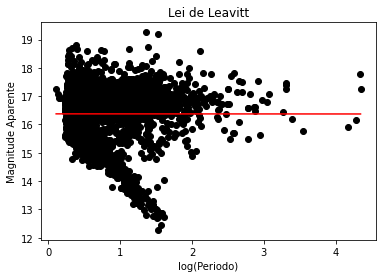

In [7]:
print('1-2 Calculando os Periodos')
progresso = IntProgress(min=0,max = len(DATABASE))
display(progresso)
relatorio = []
per_mag=[],[]   
for i in DATABASE:

    progresso.value+=1
    clf()
    texto=splitext(i)

#Carregando os Arquivos:  

    data=loadtxt('.\DATABASE\%s'%(texto[0]+texto[1]),delimiter=' ')
    t=tuple(data[:,0])
    y=tuple(data[:,1])
    del(data)
            
#Calculando os Periodos: 

    aux_1=LombScargle(t, y).autopower() #Uso do Periodograma LombScargle
    a,b = list(((1/aux_1[0]).copy()).flatten()) ,list(((aux_1[1]).copy()).flatten())
    del(aux_1)
    periodos=a[b.index(max(b))] #Definindo o periodo mais provável a partir do Periodograma
    del(a,b)
    mag=mean(y)            
    log_p=log10(periodos)
            
#Imprimindo o Relatório

    imprimir(texto[0]+texto[1],periodos,log_p,mag)
    relatorio.append([texto[0]+texto[1],periodos,log_p,mag]) 

#Guardando os resultados em variaveis           
    per_mag[0].append(log_p)
    per_mag[1].append(mag)
    del(mag)
    clf()

ajuste(list(per_mag[0]),list(per_mag[1]),'antes')  

# Terceira etapa: calcular o espaço de fase

> Após o calculo dos periodos, o algoritmo calcula o espaço de fase dos dados de magnitude e tempo das estrelas

Para o calculo do espaço de fase é necessária a biblioteca "numpy".
<pre>   - Métodos importados da biblioteca "numpy": "remainder" e "concatenate"

Função dos métodos utilizados
<pre>   - "remainder":   recebe dois arrays e retorna o resto da divisão dos elementos de mesma coluna
<pre>   - "concatenate": receber dois arrays e retorna a concatenação dos arrays.

> Esse bloco importa as funções necessárias à terceira etapa do algoritmo.

In [8]:
from numpy import remainder,concatenate

Para o calculo do espaço de fase é definida a função "phase_fold".

* A função "phase_fold" recebe os dados do tempo, da magnitude aparente e do periodo e retorna os dados da magnitude aparente e do tempo em fase com o periodo.

In [9]:
def phase_fold(t,y,period):
    
    #Essa Função Transforma a Fotometria no Espaço de Fase   
    
    phases=remainder(t,period)/period    
    return concatenate((phases,phases+1)),concatenate((y,y))

> Esse bloco lê o nome e os periodos das estrelas, carregas os dados das estrelas, calcula o espaço de fase para cada estrela e guarda os dados das estrelas - em fase - em um arquivo de texto.

In [10]:
aux=tuple(listdir('.\DATABASE'))
star=[[x[0] for x in relatorio],[x[1] for x in relatorio]]       
for i in range(len(star[0])):
        
    #Carregando os Arquivos:   
    
    data=loadtxt('.\DATABASE\%s'%(star[0][i]),delimiter=' ')
    periodos=float(star[1][i])
    t=tuple(data[:,0][1:])
    y=tuple(data[:,1][1:])          
    del(data)
            
    #Imprimindo os Dados:
    
    a1,a2=phase_fold(t,y,periodos)
    del(y)
    a1=tuple(a1.tolist()),tuple(a2.tolist())           
    del(a2)
    arquivo=open('./RESULTS/Fase-Data/%s.txt'%splitext(star[0][i])[0],'a')
    for i in range(len(a1[0])):
            arquivo.write("%f %f\n"%(a1[0][i],a1[1][i]))
    arquivo.close()
    del(arquivo,a1,periodos)
    
del(aux)  

# Quarta etapa: imprimir a curva de luz das estrelas e analisar a dispersão

> Após o cálculo do espaço de fase, o algortimo imprime a curva de luz das estrelas e calcula um coeficiente de dispersão para cada estrela.

Para imprimir as curvas de luz e fazer a análise de dispersão são necessárias as bibliotecas "cv2", "PIL", "numpy", "shutil" e "matplotlib".

<pre>   - Função importada da biblioteca "PIL.image":     "open"<br>
<pre>   - Funções importados da biblioteca "numpy": "array", "sum" e "genfromtxt"<br>
<pre>   - Método importado da função "matplotlib.pyplot":    "gcf"<br>

Função dos métodos utilizados
<pre>   - "image.open":   abre uma imagem da classe PIL.
<pre>   - "cv2.imread":   carrega uma imagem a partir de um arquivo.
<pre>   - "array":        transforma uma tupla, lista ou float em um array.
<pre>   - "sum":          retorna a soma de todos os elementos de um array.
<pre>   - "genfromtxt":   carrega um arquivo .txt em uma matriz, onde os arrays representam as colunas.
<pre>   - "gcf":          carrega a imagem na memória atual da biblioteca "matplotlib".

> Esse bloco importa as funções necessárias à quarta etapa do algoritmo.

In [11]:
import cv2
from PIL import Image
from numpy import array,sum,genfromtxt
from shutil import move
from matplotlib.pyplot import gcf

> Esse bloco carrega os dados das curvas de luz em fase (calculados na etapa anterior), em seguida imprime a curva de luz em fase, carrega as curvas de luz e faz uma contagem dos pixels - brancos e pretos - de cada curva de luz (essa contagem é feita para a imagem inteira e para um recorte horizontal no centro da imagem); depois são calculados coeficientes de dispersão (o quociente entre os pixels pretos e os brancos) e esses coeficientes determinam - a partir de um valor padrão - se á estrela é considerada despersa ou não, os resultados obtidos são dispostos em um arquivo denominado "dispersao.txt", no diretório "RESULTS". As estrelas dispersas são removidas do diretório "DATABASE" e são movidas para um diretório denominado "DISPERSAO". 

In [12]:
print('2-2 Imprimindo as curvas de luz')
progresso2 = IntProgress(min=0,max = len(relatorio))
display(progresso2)

m_dispersao,m_corte = [],[]

for i in range(len(relatorio)):

    progresso2.value+=1
    nome=splitext(relatorio[i][0])
    data=genfromtxt('.\RESULTS\\Fase-Data\\%s.txt'%nome[0],delimiter=' ')

    x=list([k[0] for k in data])
    y=list([k[1] for k in data])
        
    magnitude=float(relatorio[i][2])            
    scatter(x,y,c='k')
    title('Periodo: %f / Magnitude: %f'%(float(relatorio[i][1]),magnitude))
    xlabel('Fase')
    ylabel('Magnitude')
    (gcf()).savefig('./RESULTS/Fase/%s-Fase.png'%nome[0], format='png')
    close()

    corte = cv2.imread('./RESULTS/Fase/%s-Fase.png'%nome[0])
    
    white=sum(corte == 255)
    black=sum(corte == 0)
    dispersao=black/white 
   
    corte=Image.open('./RESULTS/Fase/%s-Fase.png'%nome[0])
    corte=corte.crop((corte.size[0]*2/10, corte.size[1]*2/10, corte.size[0]/2 - corte.size[0]*1/10,corte.size[1]/2 - corte.size[0]*1/10))
    corte=array(corte)

    white=sum(corte == 255)
    black=sum(corte == 0)   
    corte=black/white
    
    m_dispersao.append(dispersao)
    m_corte.append(corte)
    
    min_disp=0.05
    max_disp=0.15
    
    min_cort=0.02
    max_cort=0.12
                      
    if dispersao>max_disp or dispersao<min_disp:
            move('./DATABASE/%s'%relatorio[i][0],'./DISPERSAO/%s'%relatorio[i][0])
            move('./RESULTS/Fase/%s-Fase.png'%nome[0],'./RESULTS/Fase/dispersas/%s-Fase.png'%nome[0])
    else:
            if corte>max_cort or corte<min_cort:
                    move('./DATABASE/%s'%relatorio[i][0],'./DISPERSAO/%s'%relatorio[i][0])
                    move('./RESULTS/Fase/%s-Fase.png'%nome[0],'./RESULTS/Fase/dispersas/%s-Fase.png'%nome[0])
                            
    arquivo=open('.\RESULTS\dispersao.txt','a')
    arquivo.write('%s dispersão: %f corte: %f\n'%(nome[0],dispersao,corte))
    arquivo.close()
            
    del(data,nome,magnitude)
print("Calculos Concluidos... Programa encerrado")

2-2 Imprimindo as curvas de luz


IntProgress(value=0, max=4922)

Calculos Concluidos... Programa encerrado


> Esse bloco carrega a lista das estrelas dispersas (que se encontram no diretório "DISPERSAO") e carrega o documento "results.txt" com o resultado do periodo e da magnitude aparente média de cada estrela. Depois calcula a Lei de Leavitt para as estrelas que passaram no teste de dispersão.

<IPython.core.display.Latex object>

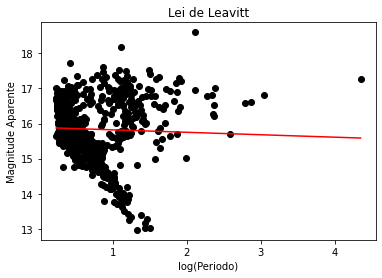

In [13]:
dispersas = listdir('./DISPERSAO')
ESTRELAS=loadtxt('./RESULTS/results.txt', delimiter=' ', dtype=str)
p_mag=[]
dispersas
ESTRELAS
for i in ESTRELAS:
    if i[0] in dispersas:
        continue
    p_mag.append([float(i[2]),float(i[3])])
    
ajuste([i[0] for i in p_mag],[i[1] for i in p_mag],'depois') 

> Esse bloco mostra os coeficientes de dispersão calculados para as estrelas no database

In [15]:
m_dispersao
m_corte

[0.2127825409197194,
 0.12216241516498946,
 0.14803849000740193,
 0.06270996640537514,
 0.16670681763430498,
 0.4064814814814815,
 0.060989383329568554,
 0.35916934776250364,
 0.24473342002600781,
 0.12412831241283125,
 0.11029585798816569,
 0.05699481865284974,
 0.0,
 0.6284796573875803,
 0.08059834784550123,
 0.20892857142857144,
 0.1568922305764411,
 0.1313460642757336,
 0.5475781518378564,
 0.49917518970636754,
 0.13018039980497317,
 0.8648077735530207,
 0.1644753162986852,
 0.18864045232588023,
 0.5285665412247691,
 0.5030794165316045,
 0.0012087026591458502,
 0.39005392450569204,
 0.13231794383626844,
 0.009838081574093051,
 0.27221324717285944,
 0.17464717741935484,
 0.356745683347966,
 0.2989719366490692,
 0.06913804866954743,
 0.4941842187991198,
 0.0012062726176115801,
 0.0026241421073879695,
 0.021197777320436303,
 0.5924006908462867,
 0.9091308165057067,
 0.17975151995770552,
 0.7573705179282868,
 0.3022598870056497,
 0.9619091326296466,
 0.05164422864709777,
 0.12300208478